# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Exercise_1 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries




# Submission Formats :

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or any other compression method.)


1. Complete IPYNB script that has the source code in Python used to access and analyze the data. The code should be submitted as an IPYNB script that can be be loaded and run in Jupyter Notebook for Python
2. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use the Data Science Computing Cluster or School of Professional Studies database servers or systems, include Linux logs of your sessions as plain text files. Linux logs may be generated by using the script process at the beginning of your session, as demonstrated in tutorial handouts for the DSCC servers.
3. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [12]:
%matplotlib inline

import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

import matplotlib as plt

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets ead the dirtydata4bestdeal CSV and load into a dataframe object

In [13]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [14]:
# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

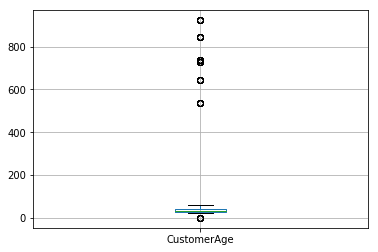

In [15]:
dirtydata4bestdeal.boxplot(column='CustomerAge')


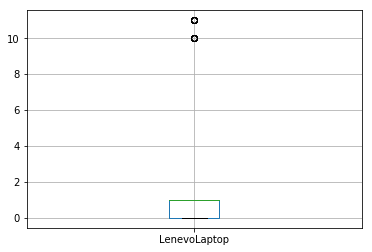

In [16]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

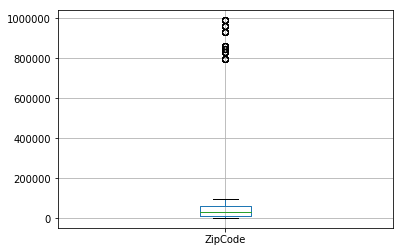

In [17]:
dirtydata4bestdeal.boxplot(column='ZipCode')

### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [30]:
dirtydata4bestdeal.shape

(10000, 34)

In [31]:
# Drop the NaN values 
cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [136]:
# Do you see NaN values dropped below?
cleandata4bestdeal.shape

(9432, 34)

In [137]:
#create data frame 
cleandata4bestdeal_df = pd.DataFrame(cleandata4bestdeal)

In [138]:
#get rid of rows that don't have 0 or 1 for products
cleandata4bestdeal_df=cleandata4bestdeal_df[cleandata4bestdeal_df[cleandata4bestdeal_df.columns[3:]].isin((0, 1)).all(axis=1)]
cleandata4bestdeal_df.shape

(9204, 34)

In [139]:
#get rid of rows that don't have a realistic age
cleandata4bestdeal_df1=cleandata4bestdeal_df[cleandata4bestdeal_df[cleandata4bestdeal_df.columns[1]].isin(range(18, 151))]
cleandata4bestdeal_df1.shape

(9140, 34)

### Lets store the cleaned data into the Database

In [140]:
engine=create_engine('sqlite:///bestdeal.db')

In [141]:
cleandata4bestdeal.to_sql('trans4cust', engine)

ValueError: Table 'trans4cust' already exists.

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [142]:
insp=inspect(engine)

In [143]:
 insp.get_table_names()

['trans4cust']

In [144]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [152]:
CustTrans60616=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [157]:
CustTrans60616

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,16,60616.0,43.0,0,1,1,0,1,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,18,60616.0,54.0,1,0,0,1,0,1.0,1.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,23,60616.0,43.0,1,1,1,0,1,1.0,1.0,...,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
4,34,60616.0,31.0,0,1,1,1,0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1
5,36,60616.0,25.0,1,1,1,0,0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
6,66,60616.0,23.0,0,1,1,0,1,0.0,1.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
7,68,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0
8,73,60616.0,45.0,1,1,1,0,1,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1
9,103,60616.0,25.0,1,1,1,0,1,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0


#### Query example #2: get the transactions for ALL customers

In [154]:
CustTrans_ALL=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [156]:
CustTrans_ALL

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1,1,0,0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1,0,0,1,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,5,2108.0,55.0,1,1,1,1,10,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,6,90033.0,44.0,1,1,1,1,0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
5,9,2109.0,37.0,0,1,1,0,1,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0
6,10,2109.0,57.0,1,0,0,1,0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
7,13,62791.0,27.0,1,1,0,1,0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
8,15,930134.0,43.0,1,1,1,0,1,1.0,1.0,...,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,11.0,1
9,16,60616.0,43.0,0,1,1,0,1,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [159]:
CustTrans_by_zipcode =pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [160]:
CustTrans_by_zipcode

,ZipCode,num_customers
0,2108.0,632
1,2109.0,955
2,2110.0,224
3,10065.0,788
4,30134.0,1173
5,30303.0,1001
6,33129.0,554
7,33130.0,280
8,44114.0,526
9,60532.0,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [161]:
CustTrans60616_by_age=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [162]:
CustTrans60616_by_age

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [163]:
CustTrans_SonyTV60LED=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

CustTrans_BoseSoundSystem=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [164]:
CustTrans_SonyTV60LED

,ZipCode,num_customers
0,2108.0,416
1,2109.0,611
2,10065.0,467
3,30134.0,774
4,30303.0,524
5,60616.0,697


In [165]:
CustTrans_BoseSoundSystem

,ZipCode,num_customers
0,2109.0,436
1,30134.0,832
2,30303.0,472
3,60616.0,467
4,90033.0,406


In [166]:
CustTrans_SonyTV60LED.ZipCode

0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [167]:
CustTrans_BoseSoundSystem.ZipCode

0     2109.0
1    30134.0
2    30303.0
3    60616.0
4    90033.0
Name: ZipCode, dtype: float64

In [168]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))


sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)

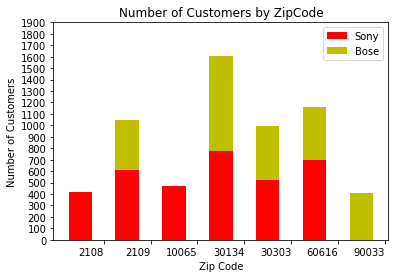

In [171]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


In [172]:
# 1.(Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
CustTrans_DellLaptopHPPrinter=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE DellLaptop=1 and HPPrinter=1   GROUP BY CustomerAge order by CustomerAge", engine)
CustTrans_DellLaptopHPPrinter

,CustomerAge,num_customers
0,21.0,201
1,22.0,217
2,23.0,320
3,25.0,65
4,26.0,192
5,27.0,280
6,28.0,56
7,29.0,151
8,31.0,216
9,32.0,184


In [174]:
#(Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
CustTrans_No_XBOX360=pd.read_sql_query(
"SELECT distinct ZipCode FROM (SELECT distinct A.ZipCode, B.ZipCode as mcode FROM (SELECT DISTINCT ZipCode FROM trans4cust) A LEFT JOIN (SELECT ZipCode, COUNT(*) as 'num_customers' FROM trans4cust WHERE XBOX360 = 1 GROUP BY ZipCode) B on A.ZipCode = B.ZipCode) WHERE mcode is NULL", engine)
CustTrans_No_XBOX360

,ZipCode
0,62791.0


In [175]:
#(Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)
CustTrans_HPLaptop=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPLaptop=1 and WDexternalHD=0  GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

CustTrans_HPPrinter=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPPrinter=1 and WDexternalHD=0  GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)


In [187]:
import numpy

HPLaptopAgeTuples=tuple(CustTrans_HPLaptop.CustomerAge.astype(numpy.int))
HPLaptop_num_customersTuples=tuple(CustTrans_HPLaptop.num_customers.astype(numpy.int))

HPPrinterAgeTuples=tuple(CustTrans_HPPrinter.CustomerAge.astype(numpy.int))
HPPrinter_num_customersTuples=tuple(CustTrans_HPPrinter.num_customers.astype(numpy.int))

HPLaptop_dict = dict(zip(HPLaptopAgeTuples, HPLapTop_num_customersTuples))
HPPrinter_dict = dict(zip(HPPrinterAgeTuples, HPPrinter_num_customersTuples))

for key in HPPrinter_dict.keys():
    if ((key in HPLaptop_dict.keys()) == False): HPLaptop_dict[key]=0

        
for key in HPLaptop_dict.keys():
    if ((key in HPPrinter_dict.keys()) == False): HPPrinter_dict[key]=0

HPLaptop_age= sorted(HPLaptop_dict.keys())
HPPrinter_age= sorted(HPPrinter_dict.keys())

HPLaptop_age_tuple=tuple(HPLaptop_age)
HPPrinter_age_tuple=tuple(HPPrinter_age)

HPLaptop_customer_list=[]

for HPLapTop in HPLaptop_age_tuple:
    HPLaptop_customer_list.append(HPLaptop_dict[HPLapTop])

HPPrinter_customer_list=[]

for HPPrinter in HPPrinter_age_tuple:
    HPPrinter_customer_list.append(HPPrinter_dict[HPPrinter])

HPLaptop_customer_tuple=tuple(HPLaptop_customer_list)
HPPrinter_customer_tuple=tuple(HPPrinter_customer_list)

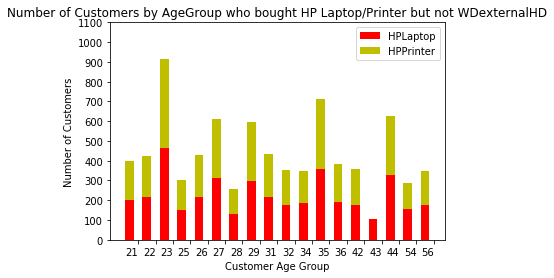

In [189]:
ind = np.arange(len(HPLaptop_customer_tuple))    
width = .5

p1 = plt.bar(ind, HPLaptop_customer_tuple, width,  color='r')
p2 = plt.bar(ind, HPPrinter_customer_tuple, width, color='y', bottom=HPLapTop_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Customer Age Group')

plt.title('Number of Customers by AgeGroup who bought HP Laptop/Printer but not WDexternalHD')

plt.xticks(ind + width, HPLaptop_age_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1200, 100))
plt.legend((p1[0], p2[0]), ('HPLaptop', 'HPPrinter'))

plt.show()